In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #library for plotting and visualisation
import matplotlib.pyplot as plt  #library for plotting and visualisation
import nltk #for text processing
import re #for text processing 
import string #for text processing
import chardet #to identify encoding

In [2]:
with open ('spam.csv','rb') as file:
    data = file.read()
    enc_details = chardet.detect(data)
    enc = enc_details['encoding']
    
dataset = pd.read_csv('spam.csv',encoding=enc)
print(dataset.head(5))

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [3]:
#label encoding of target V1 and removing NaN columns

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset = dataset.iloc[:, 0:2]
dataset['v1'] = le.fit_transform(dataset['v1'])
dataset.rename({"v1":"isSpam","v2":"msg"},inplace=True,axis=1) 
dataset = dataset.drop_duplicates(keep='first')
print(dataset.head(5))

   isSpam                                                msg
0       0  Go until jurong point, crazy.. Available only ...
1       0                      Ok lar... Joking wif u oni...
2       1  Free entry in 2 a wkly comp to win FA Cup fina...
3       0  U dun say so early hor... U c already then say...
4       0  Nah I don't think he goes to usf, he lives aro...


In [4]:
#creating new features for exploratory data analysis

def digits(text):
    return sum(char.isdigit() for char in text) 

dataset['digits'] = dataset['msg'].apply(digits)
dataset['length'] = dataset['msg'].apply(len)
print(dataset.head(5))

   isSpam                                                msg  digits  length
0       0  Go until jurong point, crazy.. Available only ...       0     111
1       0                      Ok lar... Joking wif u oni...       0      29
2       1  Free entry in 2 a wkly comp to win FA Cup fina...      25     155
3       0  U dun say so early hor... U c already then say...       0      49
4       0  Nah I don't think he goes to usf, he lives aro...       0      61


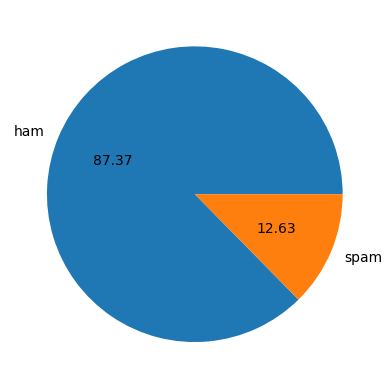

In [5]:
#plotting percentage of ham and spam

data = dataset['isSpam'].value_counts()
plt.pie(data,labels=['ham','spam'],autopct='%.2f')
plt.show()

correlation between number of characters and spam messages


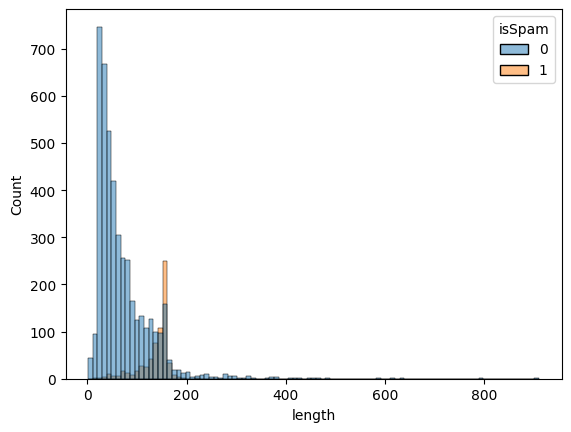

In [6]:
print("correlation between number of characters and spam messages")
plt.figure()
sns.histplot(data=dataset,x='length',hue='isSpam')
plt.show()

correlation between number of digits and spam messages


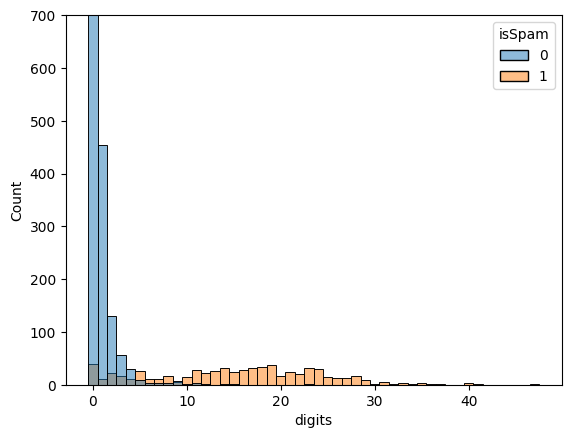

In [7]:
print("correlation between number of digits and spam messages")
plt.figure()
sns.histplot(data=dataset,x='digits',hue='isSpam',discrete=True)
plt.ylim(0,700)
plt.show()

In [8]:
#text preprocessing using nltk,re and string

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from nltk.stem import PorterStemmer
ps = PorterStemmer()

def textcleaning(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9+]', ' ', text) #numbers should not be removed since they correlate 
    text = nltk.word_tokenize(text)
    text = [word for word in text if word not in stop_words]
    text = " ".join([ps.stem(word) for word in text])
    return text

dataset['processed_msg'] = dataset['msg'].apply(textcleaning)
print(dataset.head(5))

   isSpam                                                msg  digits  length  \
0       0  Go until jurong point, crazy.. Available only ...       0     111   
1       0                      Ok lar... Joking wif u oni...       0      29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...      25     155   
3       0  U dun say so early hor... U c already then say...       0      49   
4       0  Nah I don't think he goes to usf, he lives aro...       0      61   

                                       processed_msg  
0  go jurong point crazi avail bugi n great world...  
1                              ok lar joke wif u oni  
2  free entri 2 wkli comp win fa cup final tkt 21...  
3                u dun say earli hor u c alreadi say  
4               nah think goe usf live around though  


In [9]:
#libraries for training and evaluation

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,confusion_matrix

In [10]:
#tfidf vectorization

tfidf = TfidfVectorizer()
data = tfidf.fit_transform(dataset['processed_msg'])
data = data.toarray()
print(data.shape)

(5169, 7166)


In [11]:
#train-test split
train_x,test_x,train_y,test_y = train_test_split(data,dataset['isSpam'],test_size=0.3,random_state=2,stratify=dataset['isSpam'])

In [12]:
#models to be evaluated

NB = BernoulliNB()
LR = LogisticRegression(penalty='l1',solver='liblinear')
SVC = LinearSVC()

In [13]:
#evaluation function to display accuracy,precision,recall,F1_score and confusion matrix

def evaluate(model):
    model.fit(train_x,train_y)
    pred_y = model.predict(test_x)
    print("accuracy : ",accuracy_score(test_y,pred_y))
    print("precision : ",precision_score(test_y,pred_y))
    print("recall : ",recall_score(test_y,pred_y))
    print("F1_score : ",f1_score(test_y,pred_y))
    matrix = confusion_matrix(test_y, pred_y)
    sns.heatmap(matrix,annot=True)
    plt.show()

Linear Support Vector Classifier : -
accuracy :  0.9813023855577047
precision :  0.9717514124293786
recall :  0.8775510204081632
F1_score :  0.9222520107238605


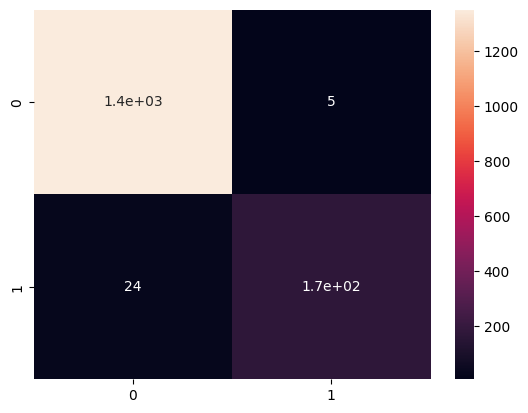

In [14]:
print("Linear Support Vector Classifier : -")
evaluate(SVC)

Bernoulli Naive Bayes Classifier : -
accuracy :  0.9800128949065119
precision :  0.9881656804733728
recall :  0.8520408163265306
F1_score :  0.915068493150685


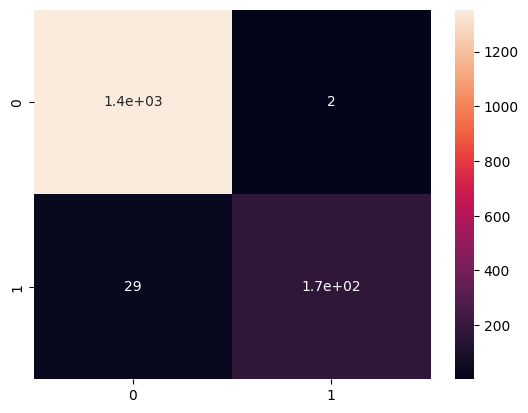

In [15]:
print("Bernoulli Naive Bayes Classifier : -")
evaluate(NB)

Logistic Regression (penalty='l1',solver='liblinear') - 
accuracy :  0.9535783365570599
precision :  0.9305555555555556
recall :  0.6836734693877551
F1_score :  0.788235294117647


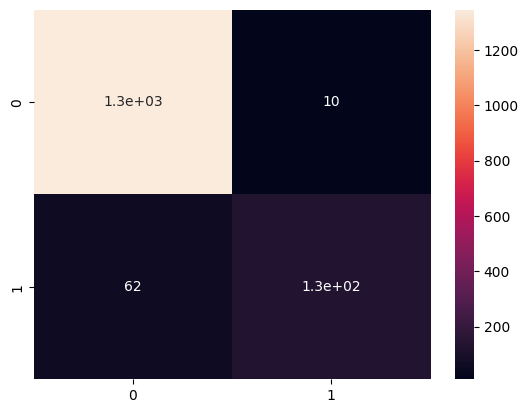

In [16]:
print("Logistic Regression (penalty='l1',solver='liblinear') - ")
evaluate(LR)